<h1> DataScience Capstone Project: </h1>
    
<h2>The Battle of the Neighborhoods </h2>

<p> An analysis of various neighborhoods in different cities in Amsterdam. This Notebook consists of two parts. The first part defines the problem statement and the potential solution for that problem statement. 
The second part of the notebook describes the actual solution for the problem statement.

Section 1 - introduction / Problem statement
An investor wants to open a coffee-shop in Amsterdam. I will make an analysis for the best location.

The best location in this case is related to other venues in the vincinity that attract customers. This could be restaurants, parks, university faculties, companies. But also the lack of other coffee-venues in the area.

Data selection and requirements
To answer the questions, I want to source data from Foursquare. To do the analysis I will use Jupyter notebooks. I'm going to use include map-visualization, analytical libraries and libraries that make it convenient to work with datasets.

To answer my question, I want to create a lists of different types of venues. Once I have categorized and clustered them, I want to plot them on a map. Based on this, I want to be able to show the best area for the coffee-shop to be opened.<p>

In [1]:
# first ensure that potentially required libraries are loaded
import pandas as pd
import numpy as np
import json

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
!pip install geopy 

import folium # map rendering library
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


In [2]:
# Foursquare credentials
CLIENT_ID = 'EZQVPDQ0DFYGXIEFRYUTYT0VAN3JMZRPGXC55YUTYBFM4Z5V' # your Foursquare ID
CLIENT_SECRET = '4LTHONG5R4ZM0X1IQQBHH03IQFHKAV0LBZDAY4RSNT5OAJLC' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZQVPDQ0DFYGXIEFRYUTYT0VAN3JMZRPGXC55YUTYBFM4Z5V
CLIENT_SECRET:4LTHONG5R4ZM0X1IQQBHH03IQFHKAV0LBZDAY4RSNT5OAJLC


In [3]:
# Find the coordinates of the center of Amsterdam (called "De Dam")

address = 'Dam, Amsterdam, Netherlands'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.37324375 4.892515060740985


In [4]:
# first we search fr coffeeshops
search_query = "Coffee"
radius = 500
print(search_query + 'I found it')

CoffeeI found it


In [5]:
coffee_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#coffee_url
coffee_url

'https://api.foursquare.com/v2/venues/search?client_id=EZQVPDQ0DFYGXIEFRYUTYT0VAN3JMZRPGXC55YUTYBFM4Z5V&client_secret=4LTHONG5R4ZM0X1IQQBHH03IQFHKAV0LBZDAY4RSNT5OAJLC&ll=52.37324375,4.892515060740985&v=20180605&query=Coffee&radius=500&limit=100'

In [6]:
coffee_results = requests.get(coffee_url).json()
#coffee_results

# assign relevant information to venues
venues = coffee_results['response']['venues']
# transform venues to a dataframe
dfv = json_normalize(venues)
dfv.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",False,5257fe4b11d27692834290b9,Rokin 55,NL,Amsterdam,Nederland,NaN,152,"[Rokin 55, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37204859355692...",52.372049,4.893601,NaN,NaN,Noord-Holland,Lois Coffee & Jeans,v-1593604673,NaN
1,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,4e2010e418a88345f03c3d3b,Nieuwezijds Voorburgwal 132,NL,Amsterdam,Nederland,NaN,204,"[Nieuwezijds Voorburgwal 132, 1012 SH Amsterda...","[{'label': 'display', 'lat': 52.3750366665651,...",52.375037,4.891881,NaN,1012 SH,Noord-Holland,Hostel Utopia/Coffee Shop (Amsterdam),v-1593604673,NaN
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4a2705cff964a520f5881fe3,Spui 28,NL,Amsterdam,Nederland,Spuistraat,553,"[Spui 28 (Spuistraat), 1012 XA Amsterdam, Nede...","[{'label': 'display', 'lat': 52.36869570531105...",52.368696,4.889210,NaN,1012 XA,Noord-Holland,Coffee Company,v-1593604673,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5c681cc41acf11002c7aa0d7,NaN,NL,Amsterdam,Nederland,NaN,523,"[1012 XA Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36891, 'lng': ...",52.368910,4.889540,Stadsdeel Centrum,1012 XA,Noord-Holland,Harar Coffee 2,v-1593604673,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5bdec64f8fb09e002cbbf24f,Dam 10,NL,Amsterdam,Nederland,NaN,42,"[Dam 10, 1012 NP Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.373604, 'lng':...",52.373604,4.892299,Stadsdeel Centrum,1012 NP,Noord-Holland,Naked Coffee,v-1593604673,NaN


In [7]:
# Now for some data-wrangling. Drop the columns I don't need. 
filtered_columns = ['name', 'categories'] + [col for col in dfv.columns if col.startswith('location.')] +  ['id']
dfv_filtered = dfv.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfv_filtered['categories'] = dfv_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dfv_filtered.columns = [column.split('.')[-1] for column in dfv_filtered.columns]

dfv_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Lois Coffee & Jeans,Clothing Store,Rokin 55,NL,Amsterdam,Nederland,NaN,152,"[Rokin 55, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37204859355692...",52.372049,4.893601,NaN,NaN,Noord-Holland,5257fe4b11d27692834290b9
1,Hostel Utopia/Coffee Shop (Amsterdam),Hotel Bar,Nieuwezijds Voorburgwal 132,NL,Amsterdam,Nederland,NaN,204,"[Nieuwezijds Voorburgwal 132, 1012 SH Amsterda...","[{'label': 'display', 'lat': 52.3750366665651,...",52.375037,4.891881,NaN,1012 SH,Noord-Holland,4e2010e418a88345f03c3d3b
2,Coffee Company,Coffee Shop,Spui 28,NL,Amsterdam,Nederland,Spuistraat,553,"[Spui 28 (Spuistraat), 1012 XA Amsterdam, Nede...","[{'label': 'display', 'lat': 52.36869570531105...",52.368696,4.889210,NaN,1012 XA,Noord-Holland,4a2705cff964a520f5881fe3
3,Harar Coffee 2,Coffee Shop,NaN,NL,Amsterdam,Nederland,NaN,523,"[1012 XA Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36891, 'lng': ...",52.368910,4.889540,Stadsdeel Centrum,1012 XA,Noord-Holland,5c681cc41acf11002c7aa0d7
4,Naked Coffee,Coffee Shop,Dam 10,NL,Amsterdam,Nederland,NaN,42,"[Dam 10, 1012 NP Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.373604, 'lng':...",52.373604,4.892299,Stadsdeel Centrum,1012 NP,Noord-Holland,5bdec64f8fb09e002cbbf24f
5,Coffeecompany,Coffee Shop,Oude Doelenstraat 11,NL,Amsterdam,Nederland,NaN,340,"[Oude Doelenstraat 11, 1012 ED Amsterdam, Nede...","[{'label': 'display', 'lat': 52.37158090831124...",52.371581,4.896721,NaN,1012 ED,Noord-Holland,4b165fe4f964a52085b823e3
6,Coffee Club Damrak,Coffee Shop,Beurspassage 12A,NL,Amsterdam,Nederland,NaN,48,"[Beurspassage 12A, 1012 LW Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37356003581148...",52.373560,4.892024,NaN,1012 LW,Noord-Holland,4a27db80f964a5202a941fe3
7,Coffeeshop Solo,Marijuana Dispensary,Korte Koningsstraat 2,NL,Amsterdam,Nederland,NaN,211,"[Korte Koningsstraat 2, 1011 GA Amsterdam, Ned...","[{'label': 'display', 'lat': 52.37213951322895...",52.372140,4.895055,NaN,1011 GA,Noord-Holland,4be166928d2b9521736390e4
8,Coffee & Cakes,Café,NaN,NL,NaN,Nederland,NaN,297,[Nederland],"[{'label': 'display', 'lat': 52.37075305612502...",52.370753,4.890934,NaN,NaN,NaN,580b7d8938fa9e6be00d4705
9,Coffee bread bar,Coffee Shop,Rokin,NL,Amsterdam,Nederland,Wijde Lombardsteeg,262,"[Rokin (Wijde Lombardsteeg), 1012 KL Amsterdam...","[{'label': 'display', 'lat': 52.37089399126098...",52.370894,4.892891,NaN,1012 KL,Noord-Holland,59523855f2905e33f2d2ad1e


In [8]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [9]:

categoryId = "4bf58dd8d48988d163941735" #category id for parks
#search_query2 = "Park"
popular_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
popular_results = requests.get(popular_url).json()
# assign relevant information to the venues
popular = popular_results['response']['venues']
# transform to a dataframe
dfvp = json_normalize(popular)
dfvp.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,5200281a2fc61d655eaa7fb3,Oudemanhuispoort,NL,Amsterdam,Nederland,493,"[Oudemanhuispoort, 1012 CN Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36932732952832...",52.369327,4.895917,De Wallen,1012 CN,Noord-Holland,Oudemanhuispoort,v-1593604674
1,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4e162a668877d38dc9039945,NaN,NL,Amsterdam,Nederland,622,"[Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36769, 'lng': ...",52.367690,4.893580,NaN,NaN,Noord-Holland,"Bakje Tegenover L,europe",v-1593604674
2,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4fd34c2ce4b0d6a97cf2e414,NaN,NL,NaN,Nederland,492,[Nederland],"[{'label': 'display', 'lat': 52.37746959744711...",52.377470,4.894680,NaN,NaN,NaN,World Naked Bike Ride,v-1593604674


In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dfvp.columns if col.startswith('location.')] + ['id']
dfvp_filtered = dfvp.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfvp_filtered['categories'] = dfvp_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dfvp_filtered.columns = [column.split('.')[-1] for column in dfvp_filtered.columns]

dfvp_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Oudemanhuispoort,Park,Oudemanhuispoort,NL,Amsterdam,Nederland,493,"[Oudemanhuispoort, 1012 CN Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36932732952832...",52.369327,4.895917,De Wallen,1012 CN,Noord-Holland,5200281a2fc61d655eaa7fb3
1,"Bakje Tegenover L,europe",Park,NaN,NL,Amsterdam,Nederland,622,"[Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36769, 'lng': ...",52.367690,4.893580,NaN,NaN,Noord-Holland,4e162a668877d38dc9039945
2,World Naked Bike Ride,Park,NaN,NL,NaN,Nederland,492,[Nederland],"[{'label': 'display', 'lat': 52.37746959744711...",52.377470,4.894680,NaN,NaN,NaN,4fd34c2ce4b0d6a97cf2e414


In [11]:
# only keep the items that are category "Park"
dfvp_park = dfvp_filtered
dfvp_park = dfvp_park.loc[dfvp_park.categories == "Park"]
dfvp_park

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Oudemanhuispoort,Park,Oudemanhuispoort,NL,Amsterdam,Nederland,493,"[Oudemanhuispoort, 1012 CN Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36932732952832...",52.369327,4.895917,De Wallen,1012 CN,Noord-Holland,5200281a2fc61d655eaa7fb3
1,"Bakje Tegenover L,europe",Park,NaN,NL,Amsterdam,Nederland,622,"[Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36769, 'lng': ...",52.367690,4.893580,NaN,NaN,Noord-Holland,4e162a668877d38dc9039945
2,World Naked Bike Ride,Park,NaN,NL,NaN,Nederland,492,[Nederland],"[{'label': 'display', 'lat': 52.37746959744711...",52.377470,4.894680,NaN,NaN,NaN,4fd34c2ce4b0d6a97cf2e414


In [12]:
parks_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the the center of Amsterdam
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parks_map)

# add the Parks as green markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(parks_map)

# display map
parks_map

In [13]:

combined_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the center of Amsterdam
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(combined_map)

# add the Parks as green markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(combined_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(combined_map)
    
# display map
combined_map

In [14]:
dfvp_park["name"].count()

3

In [15]:
dfv["name"].count()

50

In [16]:
dist = dfvp_park[["distance","name"]]
dist2 = dfv_filtered[["distance","name"]]

In [17]:
dist

,distance,name
0,493,Oudemanhuispoort
1,622,"Bakje Tegenover L,europe"
2,492,World Naked Bike Ride


In [18]:
dist2

,distance,name
0,152,Lois Coffee & Jeans
1,204,Hostel Utopia/Coffee Shop (Amsterdam)
2,553,Coffee Company
3,523,Harar Coffee 2
4,42,Naked Coffee
5,340,Coffeecompany
6,48,Coffee Club Damrak
7,211,Coffeeshop Solo
8,297,Coffee & Cakes
9,262,Coffee bread bar


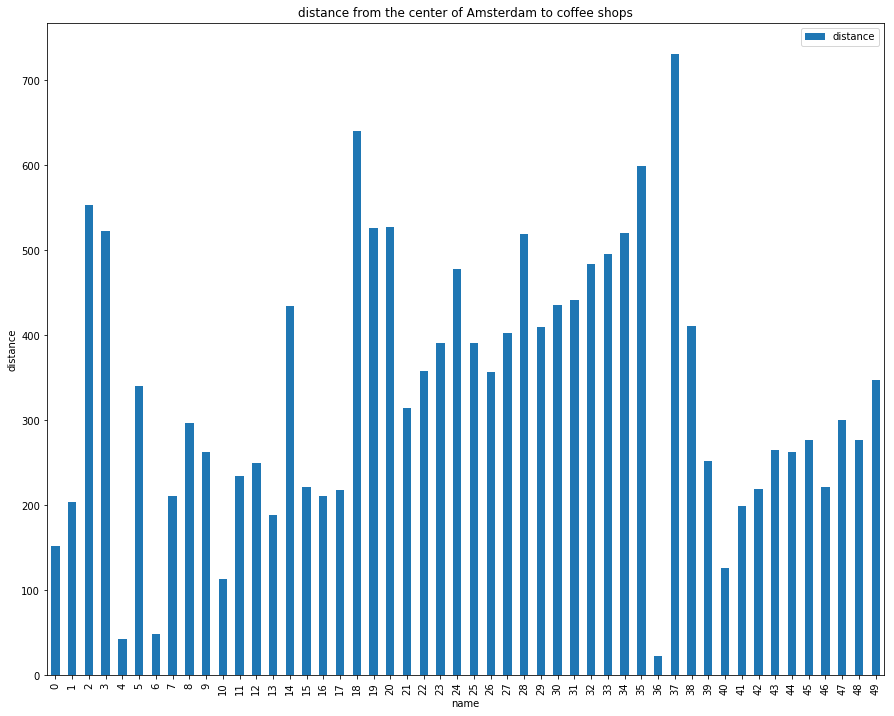

In [21]:
dist2.plot(kind='bar', figsize=(15, 12))
plt.xlabel('name')
plt.ylabel('distance')
plt.title('distance from the center of Amsterdam to coffee shops')
plt.show()